# 1. салангид хувьсагчийн магадлалт тархалтын хэлбэрүүд

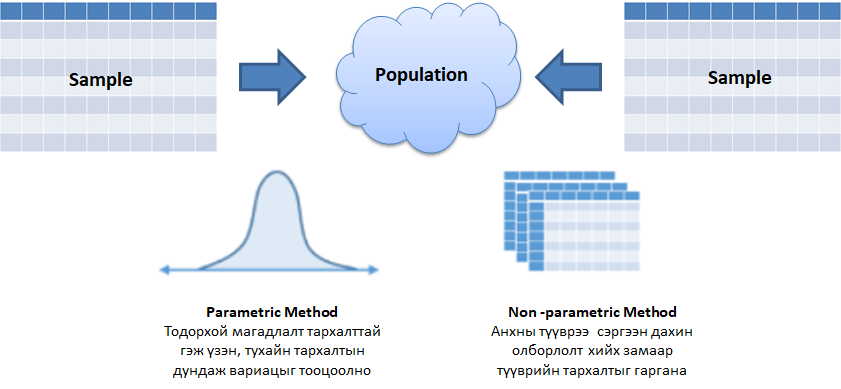

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# Графикийн шугамын төрөл
linestyles = ['-', '--', ':']

# хүлээгдэж буй утга болон вариацыг тооцолон гаргадаг E, V Функц
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 1.1 Bernoulli distribution

гэдэг нь үр дүн нь "амжилттай" (1), эсвэл "амжилтгүй" (0) гэсэн хоёр боломжоос санамсаргүйгээр сонгогддог туршилтыг хэлнэ.

Зоос сүлд-ээрээ буусан уу?

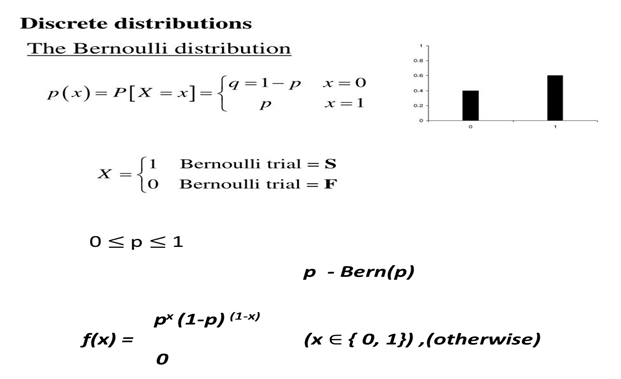

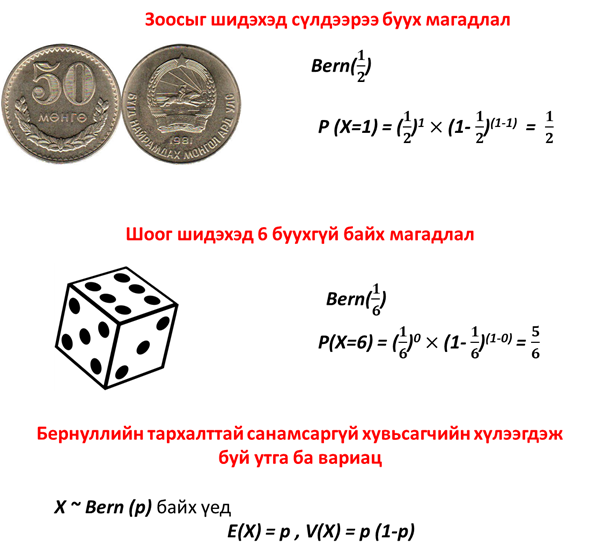

In [27]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            # p -iin x zeregiig 1-p -iin 1-x zeregiig vrjvvlne
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [4]:
#Bern (0,3) 
p = 0.3
X = Bern(p)

In [5]:
# hvleegdej bui utga 0.3
# вариац 0.21
check_prob(X)

expected value 0.3
variance 0.21


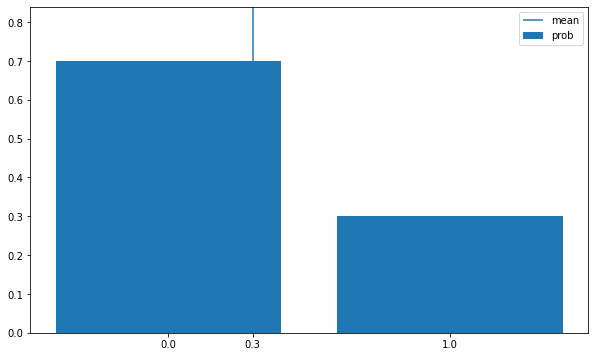

In [6]:
# дунд талын босоо зураас нь санамсаргү хувьсагччx - ийн хүлээгдэж буй утга
plot_prob(X)

In [7]:
# p бернуллийн тархалттай санамсаргүй хувьсагч үүсгэнэ
rv = stats.bernoulli(p)

In [8]:
# амжилтгүй байх магадлал 70 %
# амжилттай байх магадлал 30 %
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [9]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [10]:
# хуримтлагдсан тархалтыг тооцоолно
rv.cdf([0, 1])

array([0.7, 1. ])

In [11]:
rv.mean(), rv.var()

(0.3, 0.21)

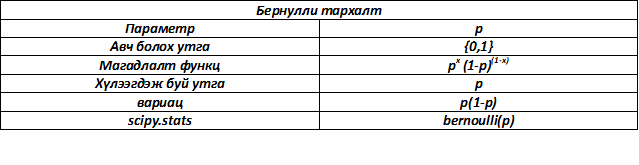

## 1.2 Binomial distribution

олон удаа давтагдсан туршилт, судалгаанд АМЖИЛТТАЙ эсвэл АМЖИЛТГҮЙ гарах магадлал.

АМЖИЛТТАЙ байх магадлал p хэрэгжих n гэсэн 2 утгатай 

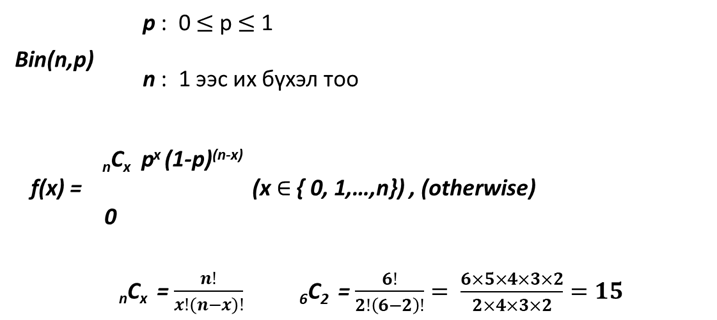

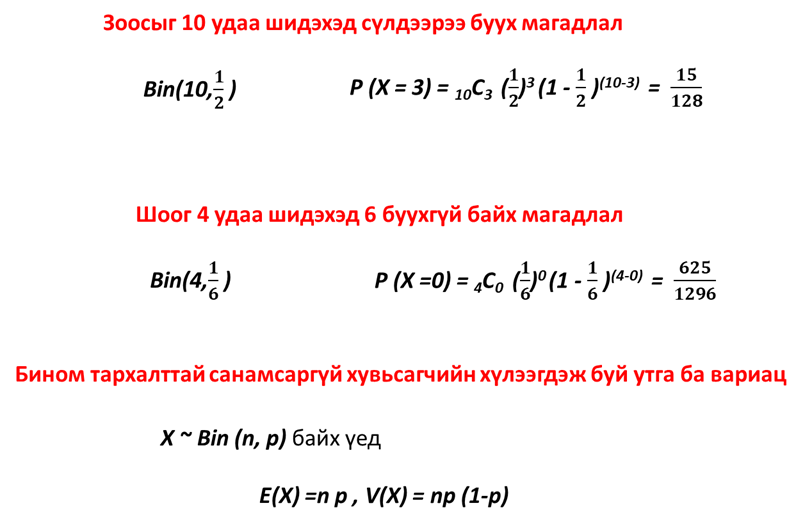

In [28]:
from scipy.special import comb

# comb = ccombination 
def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [13]:
# Bin(10,0.3)
n = 10
p = 0.3
X = Bin(n, p)

In [14]:
check_prob(X)

expected value 3.0
variance 2.1


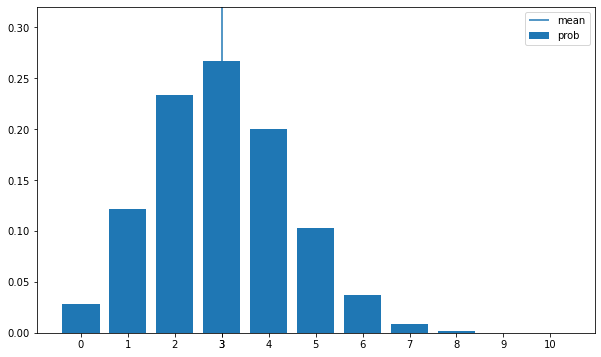

In [15]:
plot_prob(X)

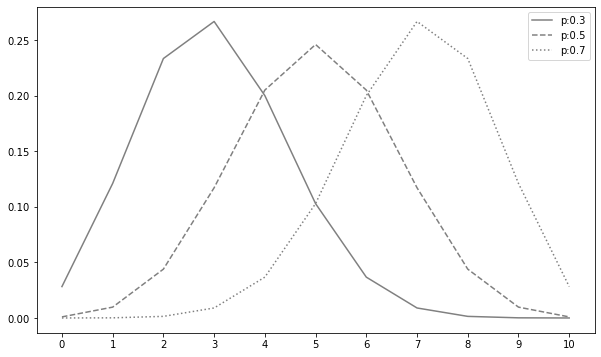

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

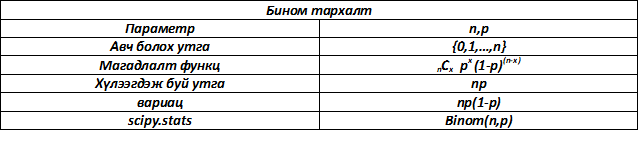

## 1.3 geometric distribution

геометр тархалт нь бернуллийн тархалттай санамсаргүй хувьсагч 1 гарах буюу амжилттай болох хүртэл давтагдах тоон тархалт юм.

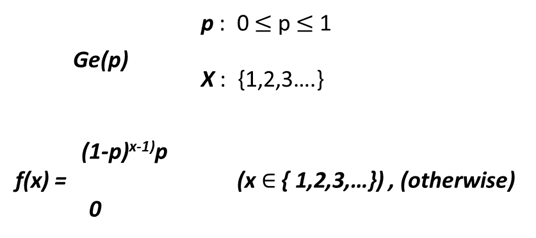

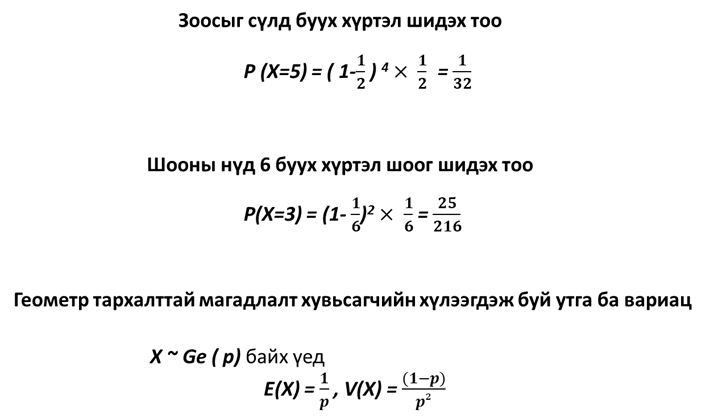

In [17]:
def Ge(p):
    # 1 - 29 bvhel too 
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [18]:
#Ge(1/2) 
p = 0.5
X = Ge(p)

In [19]:
#E(X) =  1/p , V(X) = ((1-p))/p²
check_prob(X)

expected value 2.0
variance 2.0


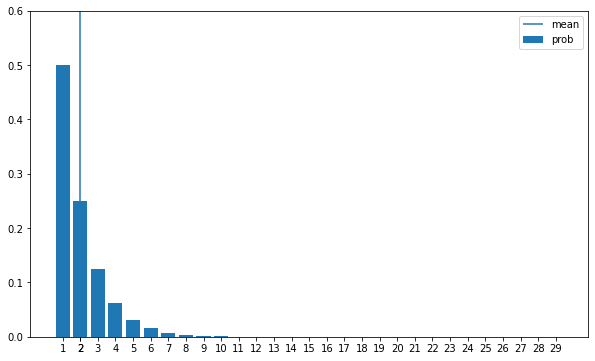

In [20]:
plot_prob(X)

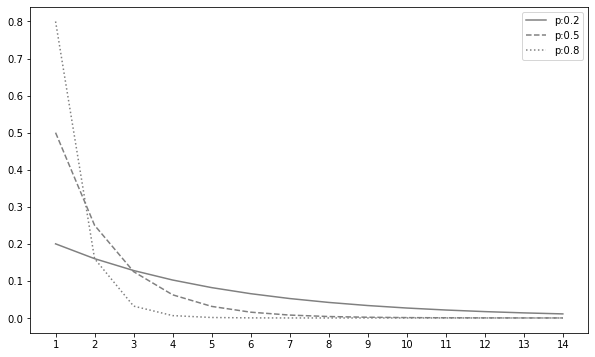

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

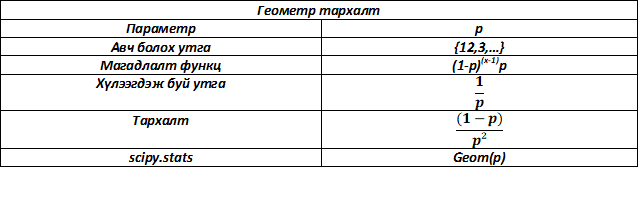

## 1.4 Poisson distribution

Пауссаны тархалт: санамсаргүйгээр нэгж хугацаанд үйл явдал болох хэрэгийн тоогоор илэрхийлэгддэх магадлалт тархалт юм.

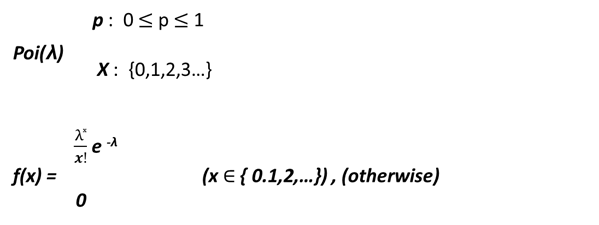

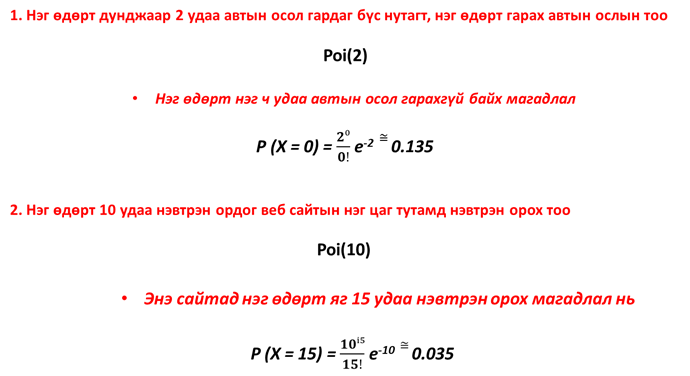

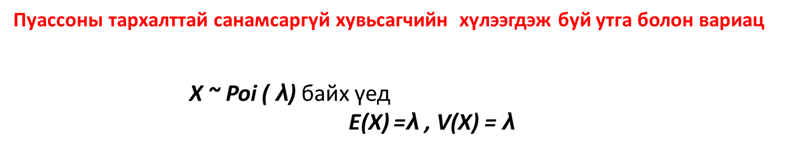

In [22]:
from scipy.special import factorial

def Poi(lam):
    # 0 ees ih 19 oos baga utga awna
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [23]:
#poi(3) 
lam = 3
X = Poi(lam)

In [24]:
check_prob(X)

expected value 3.0
variance 3.0


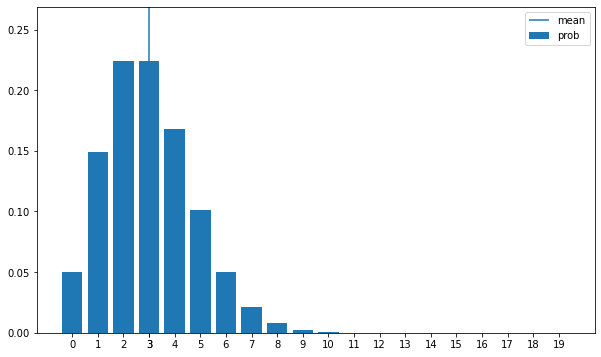

In [25]:
plot_prob(X)

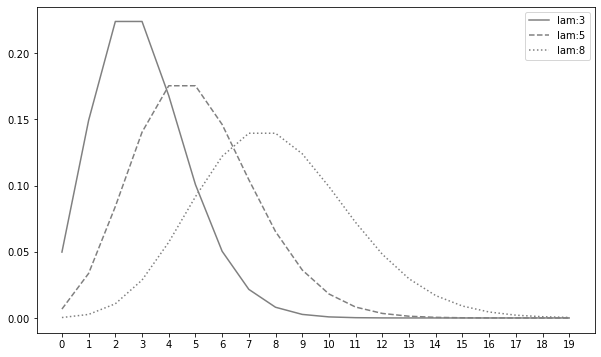

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

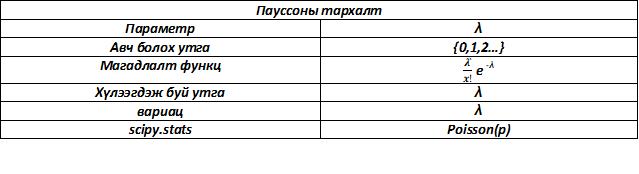